In [1]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from skimage import morphology, io, color, exposure, img_as_float, transform
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
def loadDataGeneral(df, path, im_shape):
    X=[]
    for i, item in df.iterrows():
        img = img_as_float(io.imread(path + item[0]))
        img = transform.resize(img, im_shape)
        img = exposure.equalize_hist(img)
        img = np.expand_dims(img, -1)
        X.append(img)        
    X = np.array(X)
    X -= X.mean()
    X /= X.std()

    return X

In [3]:
def remove_small_regions(img, size):
    """Morphologically removes small (less than size) connected regions of 0s or 1s."""
    img = morphology.remove_small_objects(img, size)
    img = morphology.remove_small_holes(img, size)
    return img

C:\Users\AMAN VERMA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Data2/res/0.jpg is a low contrast image
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\AMAN VERMA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Data2/res/1.jpg is a low contrast image
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\AMAN VERMA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Data2/res/2.jpg is a low contrast image
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\AMAN VERMA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Data2/res/3.jpg is a low contrast image
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to 

<Figure size 720x720 with 0 Axes>

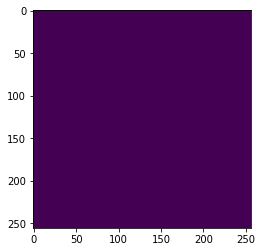

In [10]:
if __name__ == '__main__':

    # Path to csv-file. File should contain X-ray filenames as first column,
    csv_path = 'idx2.csv'
    # Path to the folder with images. Images will be read from path + path_from_csv
    path = 'Data2/'

    df = pd.read_csv(csv_path)
    
      # Load test data
    im_shape = (256, 256)
    X = loadDataGeneral(df, path, im_shape)

    n_test = X.shape[0]
    inp_shape = X[0].shape


    # Load model
    model_name = r"C:\Users\AMAN VERMA\Desktop\Machine Learning\PS 1\Lung Segmentation\trained_model.hdf5"
    UNet = load_model(model_name)

    # For inference standard keras ImageGenerator can be used.
    test_gen = ImageDataGenerator(rescale=1.)

    prs = []
    i = 0
    plt.figure(figsize=(10, 10))
    for xx in test_gen.flow(X, batch_size=1):
        img = exposure.rescale_intensity(np.squeeze(xx), out_range=(0,1))
        pred = UNet.predict(xx)[..., 0].reshape(inp_shape[:2])
        
        pr = pred > 0.5

        pr = remove_small_regions(pr, 0.02 * np.prod(im_shape))
       
        A=pred
        A[:,:]=0
        
        index = pred>0.2
        
        for c in range(256):   
            for d in range(256):
                A[c,d]= img[c,d]*index[c,d]
        
        io.imsave("Data2/res/"+str(i)+".jpg",A)

        i += 1
        if i == n_test:
            break


    plt.tight_layout()
    plt.savefig('results2.png')
    plt.show()

    A=pred
    A[:,:]=0
    x=X[3,:,:,0]
    index = pred>0.2
    
    
    for xx in range(256):   
        for yy in range(256):
            A[xx,yy]= x[xx,yy]*index[xx,yy]
            
    plt.imshow(A)

In [ ]:
"C:\Users\AMAN VERMA\Desktop\Machine Learning\PS 1\Lung Segmentation\Data2\1.jpeg.jpg"